In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sin
import pickle as pkl

In [22]:
if "./param_tools/" not in sys.path: sys.path.append("./param_tools/")
import param_tools

In [ ]:
n_samples=10000
topwidth = 1 #always

height = 1
basewidth = 1.1
epsilon = (basewidth - topwidth)/2

In [ ]:
intriangles = np.random.rand(n_samples) <= epsilon / (1 + epsilon)
intriangles.mean()

0.04890.0436

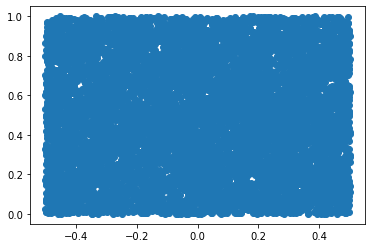

In [ ]:
n_triangles_points =  np.count_nonzero(intriangles)
n_rectangle_points = n_samples - n_triangles_points
rectangle_points = np.random.rand(n_rectangle_points, 2)
rectangle_points[:, 0] -= .5
plt.scatter(rectangle_points[:, 0], rectangle_points[:, 1])

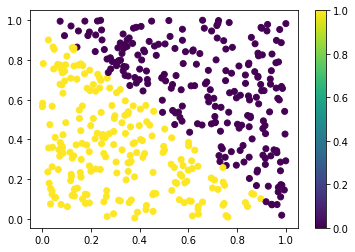

In [ ]:
triangles_points = np.random.rand(n_triangles_points, 2)
in_first_triangle = triangles_points[:, 0] <= (1 - triangles_points[:, 1])
plt.scatter(triangles_points[:, 0], triangles_points[:, 1], c=in_first_triangle)

plt.colorbar()

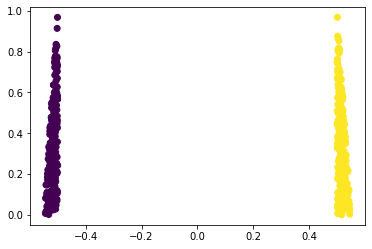

In [ ]:
triangles_points = np.random.rand(n_triangles_points, 2)
in_first_triangle = triangles_points[:, 0] <= (1 - triangles_points[:, 1])
#plt.scatter(triangles_points[:, 0], triangles_points[:, 1], c=in_first_triangle)

triangles_points[:, 0] *= epsilon
triangles_points[in_first_triangle, 0]+= .5
triangles_points[~in_first_triangle, 1] = 1 - triangles_points[~in_first_triangle][:, 1]
triangles_points[~in_first_triangle, 0] -= epsilon + .5

plt.scatter(triangles_points[:, 0], triangles_points[:, 1], c=in_first_triangle)


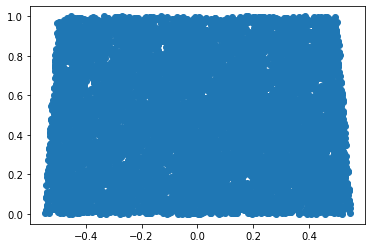

In [ ]:
samples = np.empty((n_samples, 2))
samples[intriangles] = triangles_points
samples[~intriangles] = rectangle_points
plt.scatter(samples[:, 0], samples[:, 1])

In [44]:
from algorithm import factorize

results = factorize(sample)

# results on trapezoid

In [ ]:
#output by code on the original paper
with open("../trapezoid/results.pkl", "rb") as f:
    results_trap = pkl.load(f)

In [ ]:
results_trap

{'data': array([[ 0.24826798,  0.18020271],
        [-0.11097686,  0.03760018],
        [-0.48821226,  0.99626787],
        ...,
        [-0.07776184,  0.58903932],
        [-0.63288522,  0.36100258],
        [-0.48513137,  0.45409677]]),
 'phi': array([[ 1.00000000e+00,  6.87297608e-01, -6.93961034e-01, ...,
         -1.91390770e-03,  1.49238376e-02,  5.41753914e-03],
        [ 1.00000000e+00, -3.00172032e-01, -9.93770099e-01, ...,
         -1.73119966e-03,  7.57850024e-06, -6.43671271e-03],
        [ 1.00000000e+00, -9.67082727e-01,  1.69369977e+00, ...,
          1.93165747e-02,  5.72623109e-02, -1.19408346e-02],
        ...,
        [ 1.00000000e+00, -1.75771494e-01,  7.24845476e-01, ...,
         -4.97400896e-03, -2.81077969e-03,  1.53181789e-02],
        [ 1.00000000e+00, -1.47696924e+00, -6.80680665e-01, ...,
         -1.39487536e-03,  1.78067887e-03, -1.31352414e-04],
        [ 1.00000000e+00, -1.14564202e+00, -1.21345941e-01, ...,
          3.57682322e-04, -5.20697008e-03,  3.

In [ ]:
def get_from_dict(d, values, sep=","):
    return [d[i.strip()] for i in values.split(sep)]

In [ ]:
data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds = \
    get_from_dict(results_trap, "data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds")



In [ ]:
data.shape

(10000, 2)

In [ ]:
phi.shape

(10000, 100)

In [ ]:
manifolds

[array([ 1,  8, 23, 31, 46, 50, 67]),
 array([ 2,  3,  6,  7, 14, 19, 25, 32, 34, 40, 42, 44, 48, 51, 52, 58, 61,
        69, 71, 79, 85])]

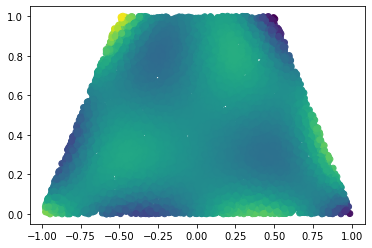

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=phi[:, 2])

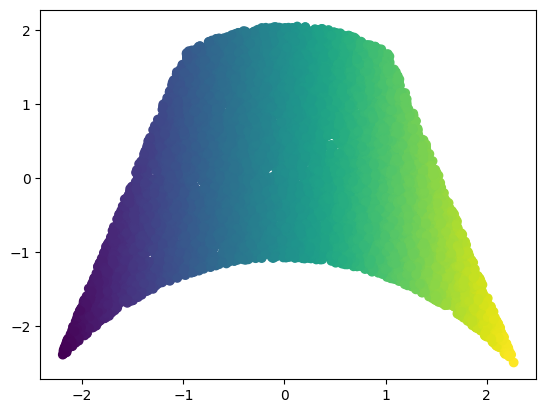

In [ ]:
plt.scatter(phi[:, 1], phi[:, 2], c=phi[:, 1])

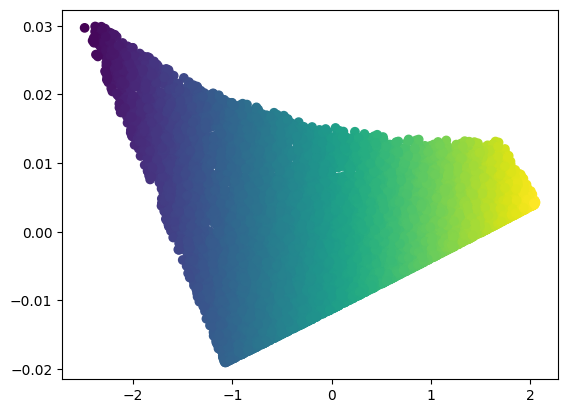

In [ ]:
plt.scatter(phi[:, 2], phi[:, 3], c=phi[:,2])

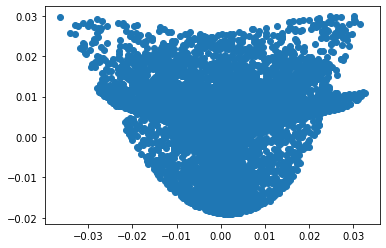

In [53]:
plt.scatter(phi[:, 8], phi[:, 3])

## Test param_tools

Use `param_tools` byx Max Kapur to sample from more complicated stuff

In [42]:
from param_tools import r_surface

In [38]:
X_grid, Y_grid = np.meshgrid(np.linspace(0,1, 100), 
                             np.linspace(0,1,100), indexing="ij")


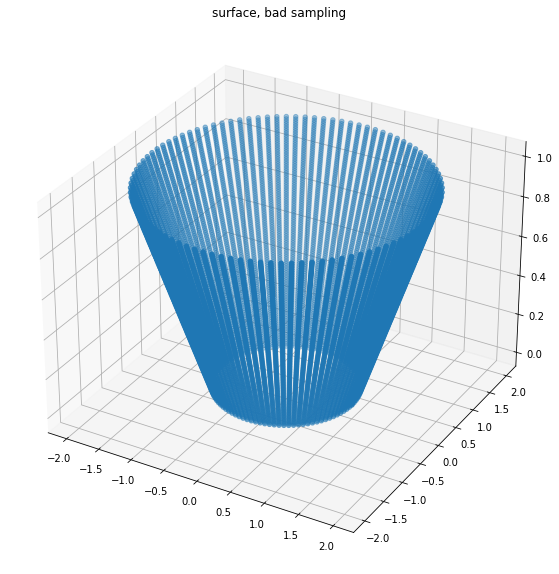

In [40]:
surface = lambda theta, z: np.array(((z+1)* cos(2 * np.pi * theta), 
                            (z+1) * sin(2 * np.pi * theta),
                            z))
                            
surface_values = surface(X_grid, Y_grid)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
ax.set_title("surface, bad sampling")
#ax.set_box_aspect((np.ptp(testset_3D[...,0]), np.ptp(testset_3D[...,1]), np.ptp(testset_3D[...,2])))
p = ax.scatter(surface_values[0],
               surface_values[1],
               surface_values[2]
   )
#fig.colorbar(p)


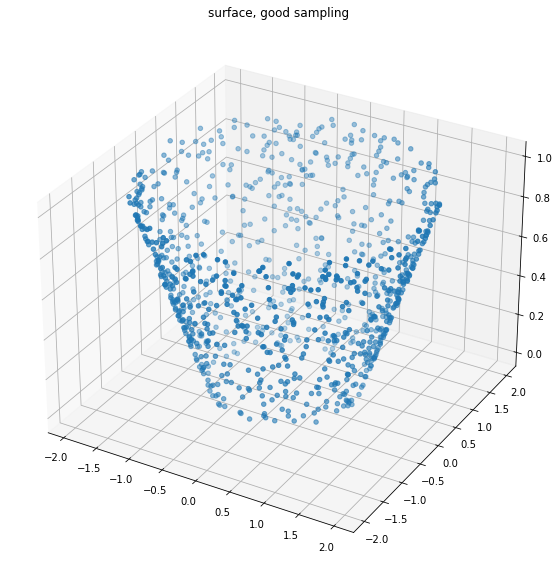

In [51]:
good_sample, *_ = r_surface(1000, surface, 0, 1, 0, 1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
ax.set_title("surface, good sampling")
#ax.set_box_aspect((np.ptp(testset_3D[...,0]), np.ptp(testset_3D[...,1]), np.ptp(testset_3D[...,2])))
p = ax.scatter(good_sample[0],
               good_sample[1],
               good_sample[2]
   )



In [ ]:
g